Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
import pandas as pd

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-20 12:14:55--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.141.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.141.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.3’

instacart_online_gr 100%[===================>] 196.03M  74.3MB/s    in 2.6s    

2020-01-20 12:14:58 (74.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.3’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd


Note: I will need 
1. `product_id` column from order_products_prior and order_products_trains DFs
2. `product_name` from products DF

In [7]:
#Checking order_products__prior dataset
order_products__prior=pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
#Checking for order_products__train dataset
order_products__train=pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
#Checking for products dataset
products=pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
#Creating order_products
order_products=pd.concat([order_products__prior,order_products__train],axis=0)
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
#Creating a dataframe for top 10 products
relevant_product=pd.DataFrame({'product_name':['Banana',
                  'Bag of Organic Bananas',
                  'Organic Strawberries',
                  'Organic Baby Spinach',
                  'Organic Hass Avocado',
                  'Organic Avocado',
                  'Large Lemon',
                  'Strawberries',
                  'Limes',
                  'Organic Whole Milk']})
relevant_product

,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Whole Milk


In [12]:
#Filtering products DF with just the relevant product names
condition=products['product_name'].isin (relevant_product['product_name'])
product_sub= products[condition]
print(product_sub.shape)
product_sub.head(10)

(10, 4)


,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [13]:
#Merging order_products DF and products_sub DF
top_10_products=pd.merge(product_sub,order_products, on='product_id',how='inner')
print(top_10_products.shape)
top_10_products.head()

(2418314, 7)


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,13176,Bag of Organic Bananas,24,4,5,1,1
1,13176,Bag of Organic Bananas,24,4,27,1,1
2,13176,Bag of Organic Bananas,24,4,29,3,1
3,13176,Bag of Organic Bananas,24,4,32,3,1
4,13176,Bag of Organic Bananas,24,4,42,3,1


In [14]:
#Removing unnecessary columns
top_10_products=top_10_products.drop(['product_id', 
                                      'aisle_id', 
                                      'department_id', 
                                      'order_id',
                                      'add_to_cart_order',
                                      'reordered'],axis=1)
top_10_products

,product_name
0,Bag of Organic Bananas
1,Bag of Organic Bananas
2,Bag of Organic Bananas
3,Bag of Organic Bananas
4,Bag of Organic Bananas
...,...
2418309,Organic Avocado
2418310,Organic Avocado
2418311,Organic Avocado
2418312,Organic Avocado


In [15]:
# Determining the number of times the top 10 products were ordered
top_10_products['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [16]:
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


##Task 1:Replicate the lesson code.
##Objective 1: Concatenating

In [17]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mb1Oxyw.png'
example = Image(url=url, width= 600)

display(example)

#Question: Why is the file not showing up?

In [18]:
# Checking aisles dataset
aisles=pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
#Checking departments dataset
departments= pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
#Checking order_products__prior dataset
order_products__prior=pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [21]:
#Checking for order_products__train dataset
order_products__train=pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [22]:
# Checking for orders dataset
orders=pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Note: Useful columns
1. order_id
2. user_id
3. order_dow
4. order_hour_of_day
5. order_number

In [23]:
#Checking for products dataset
products=pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Note: Useful columns
1. product_id
2. product_name

Concatenate order_products_prior and order_products__train


In [24]:
#Creating order_products
order_products=pd.concat([order_products__prior,order_products__train],axis=0)
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
#Checking for null values
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

##Objective 2: Merging

Note: 

**Orders DF**
1. user_id
2. order_id
3. order_number
4. order_dow
5. order_hour_of_day

**Products DF**
1. product_id
2. product_name

**Order_Products DF**
1. order_id
2. product_id
3. add_to_cart_order

In [28]:
#Create a condition using '&' operator
condition = (orders['user_id']==1) & (orders['order_number']<=2)
order_subset=orders[condition]
print(order_subset.shape)
order_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [27]:
# Creating a condition using '|'operator
condition=(orders['order_id']==2539329) | (orders['order_id']==2398795)
orders_subset=orders[condition]
print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [29]:
# Filtering order_product dataframe
condition=(order_products['order_id']==2539329) | (order_products['order_id']==2398795)
order_products_subset=order_products[condition]
print(order_products_subset.shape)
order_products_subset.head(11)

(11, 4)


,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [30]:
# Merging the orders DF and order_products DF
orders_and_products= pd.merge(orders_subset, 
                              order_products_subset, 
                              on ='order_id', 
                              how='inner')
print(orders_and_products.shape)
orders_and_products.head(11)

(11, 10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [31]:
# Removing unnecessary columns
orders_and_products=orders_and_products.drop(['eval_set',
                                              'days_since_prior_order',
                                              'reordered'],axis=1)
print(orders_and_products.shape)
orders_and_products.head(11)

(11, 7)


,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5
5,2398795,1,2,3,7,196,1
6,2398795,1,2,3,7,10258,2
7,2398795,1,2,3,7,12427,3
8,2398795,1,2,3,7,13176,4
9,2398795,1,2,3,7,26088,5


In [32]:
#Identifying the relevant product ids
orders_and_products['product_id']



0       196
1     14084
2     12427
3     26088
4     26405
5       196
6     10258
7     12427
8     13176
9     26088
10    13032
Name: product_id, dtype: int64

In [33]:
#Slimming down product DF the long way
condition=((products['product_id']==196) | (products['product_id']==14084) | 
          (products['product_id']==12427) | (products['product_id']==26088) | 
          (products['product_id']==26405) | (products['product_id']==10258) | 
          (products['product_id']==13176) | (products['product_id']==13032))
product_sub=products[condition]
print(product_sub.shape)
product_sub.head(11)

(8, 4)


,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [34]:
#Slimming down product DF the better way
condition=products['product_id'].isin(orders_and_products['product_id'])
products_subset=products[condition]
print(products_subset.shape)
products_subset.head(8)

(8, 4)


,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [35]:
#Merging orders_and_products and products_subset
final=pd.merge(orders_and_products, 
               products_subset, 
               on='product_id', 
               how= 'inner')
print(final.shape)
final.head()

(11, 10)


,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name,aisle_id,department_id
0,2539329,1,1,2,8,196,1,Soda,77,7
1,2398795,1,2,3,7,196,1,Soda,77,7
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk,91,16
3,2539329,1,1,2,8,12427,3,Original Beef Jerky,23,19
4,2398795,1,2,3,7,12427,3,Original Beef Jerky,23,19


In [36]:
# Reordering columns
final = final[['user_id',
              'order_id', 
              'order_number','order_dow',
              'order_hour_of_day',
              'add_to_cart_order', 
              'product_id',
              'product_name']]
print(final.shape)
final.head()

(11, 8)


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky


In [37]:
#Sorting rows
final =final.sort_values(by=['order_number','add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [38]:
#Removing underscores from header
final.columns=[column.replace('_',' ') for column in final]
final

#Question,why didn't the space beween words show up?

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


##Follow along Tidy Data

In [39]:
import numpy as np

table1 = pd.DataFrame(
    [['John Smith', np.nan, 2],
     ['Jane Doe', 16,    11], 
     ['Mary Johnson', 3,      1]],
    index=['0', '1', '2'], 
    columns=['Name','treatmenta', 'treatmentb'])

table1

,Name,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


Table to Tidy format

In [40]:
# Melt function from wide to tidy
tidy1=table1.melt(id_vars='Name', value_vars=['treatmenta', 'treatmentb'])
tidy1

,Name,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [41]:
#Renaming columns
tidy1=tidy1.rename(columns={'variable':'trt','value':'result'})
tidy1

,Name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [42]:
# Removing 'treatment'
tidy1.trt=tidy1.trt.str.replace('treatment','')
tidy1

,Name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


Tidy format to Wide Table format


In [43]:
wide=tidy1.pivot_table(index='Name', columns='trt', values='result')
wide

trt,a,b
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [44]:
wide=wide.rename(columns={'trt':'Name','a':'treatmenta','b':'treatmentb'})
wide

trt,treatmenta,treatmentb
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Follow Along Seaborn


In [0]:
import seaborn as sns

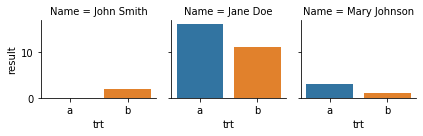

In [46]:
#Some seaborn functionality
sns.catplot(x='trt', 
            y= 'result', 
            col='Name', 
            kind='bar', 
            data=tidy1, 
            height = 2);

Plotting half and half ultra pasteurized abd half baked Frozen yogurt

In [47]:
#Recalling products df
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [48]:
#Recalling orders df
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [49]:
#Recalling order_products df
order_products.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [50]:
# Relevant products
product_names=['Half Baked Frozen Yogurt', 'Chocolate Sandwich Cookies']
product_names

['Half Baked Frozen Yogurt', 'Chocolate Sandwich Cookies']

In [51]:
#Reviewing column headers for each DFs
print(orders.columns.to_list())
print(order_products.columns.to_list())
print(products.columns.to_list())

['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['product_id', 'product_name', 'aisle_id', 'department_id']


In [52]:
#Merging the 3 DFs into one DF with relevant columns
merged= (products[['product_id','product_name']]
        .merge(order_products[['order_id','product_id']])
        .merge(orders[['order_id', 'order_hour_of_day']]))
merged.head(3)

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11


In [53]:
condition=((merged['product_name']=='Half Baked Frozen Yogurt') | 
          (merged['product_name']=='Chocolate Sandwich Cookies'))
merged=merged[condition]
print(merged.shape)
merged.head()

(4911, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
17,1,Chocolate Sandwich Cookies,5319,14
24,1,Chocolate Sandwich Cookies,7540,14
31,1,Chocolate Sandwich Cookies,9228,10
35,1,Chocolate Sandwich Cookies,9273,15


In [54]:
#Checking for all unique products in the merged DF
merged['product_name'].unique()

array(['Chocolate Sandwich Cookies', 'Half Baked Frozen Yogurt'],
      dtype=object)

In [55]:
#Using isin method
condition=merged['product_name'].isin(product_names)
subset=merged[condition]
print(subset.shape)
subset.head()


(4911, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
17,1,Chocolate Sandwich Cookies,5319,14
24,1,Chocolate Sandwich Cookies,7540,14
31,1,Chocolate Sandwich Cookies,9228,10
35,1,Chocolate Sandwich Cookies,9273,15


In [0]:
froyo=subset[subset['product_name']=='Half Baked Frozen Yogurt']
choco= subset[subset['product_name']=='Chocolate Sandwich Cookies']

In [57]:
import matplotlib.pyplot as plt

# Percentages of orders based on hour of the day for Half Baked Frozen Yogurt
froyo1= froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()
froyo1

0     0.005364
1     0.002682
2     0.002682
3     0.001006
4     0.000670
5     0.003352
6     0.006034
7     0.019779
8     0.029836
9     0.042910
10    0.059001
11    0.067717
12    0.065035
13    0.078780
14    0.084479
15    0.095206
16    0.092189
17    0.084814
18    0.085484
19    0.066376
20    0.049279
21    0.028830
22    0.016426
23    0.012068
Name: order_hour_of_day, dtype: float64

In [58]:
# Percentages of orders based on hour of the day for Chocolate Sandwich Cookies
choco1= choco['order_hour_of_day'].value_counts(normalize=True).sort_index()
choco1

0     0.006224
1     0.006224
2     0.004668
3     0.002593
4     0.002075
5     0.003631
6     0.006743
7     0.020228
8     0.042531
9     0.075726
10    0.110477
11    0.090768
12    0.084544
13    0.090768
14    0.090768
15    0.067427
16    0.075207
17    0.073651
18    0.034751
19    0.028527
20    0.019191
21    0.024896
22    0.018672
23    0.019710
Name: order_hour_of_day, dtype: float64

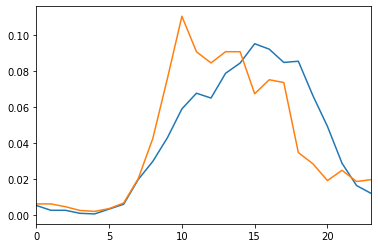

In [59]:
# Plotting
(froyo1).plot();
(choco1).plot();

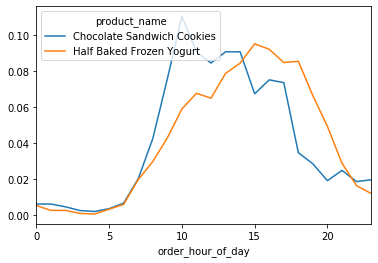

In [60]:
#Using Crosstab
(pd.crosstab(subset['order_hour_of_day'],subset['product_name'], 
            normalize='columns').plot());

##Pivot Table


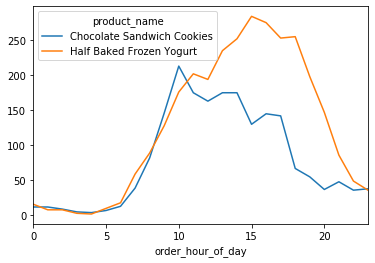

In [61]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot();

##Task 2: Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. 

In [62]:
# Creating table 2
table2 = pd.DataFrame(
    [['treatmenta', np.nan, 16, 3],
     ['treatmentb', 2, 11, 1]],
    index=['0', '1'], 
    columns=['trt', 'John Smith','Jane Doe', 'Mary Johnson'])

table2



,trt,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16,3
1,treatmentb,2.0,11,1


In [63]:
# table2 -> tidy
tidy2=table2.melt(id_vars='trt', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,trt,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [64]:
#tidy2 to table
wide2=tidy2.pivot_table(index='trt', columns='variable', values='value')
wide2

variable,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
# Attempting to re-order column
# Question: I think the nested index is messing me up, what can I do?

#wide2=wide2[['variable','John Smith','Jane Doe', 'Mary Johnson']]
#wide2


## Flights DF

In [65]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [66]:
# Flights Pivot Table
Flight1=flights.pivot_table(index='year', columns='month', values='passengers')
print(Flight1.shape)
Flight1

(12, 12)


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


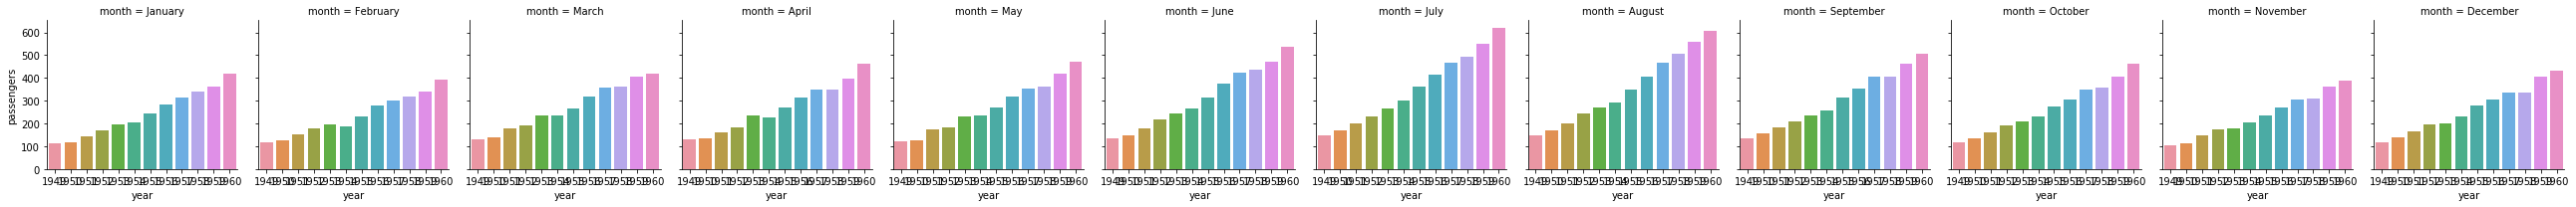

In [67]:
# Random Visuals
sns.catplot(x='year', 
            y= 'passengers', 
            col='month', 
            kind='bar', 
            data=flights, 
            height = 3);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [68]:
##### YOUR CODE HERE #####
#Reviewing column headers for each DFs
print(orders.columns.to_list())
print(order_products.columns.to_list())
print(products.columns.to_list())

['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['product_id', 'product_name', 'aisle_id', 'department_id']


In [69]:
#Filter orders column
orders_filtered=orders.drop(['user_id', 'eval_set', 'order_number', 'order_dow', 'days_since_prior_order'],axis=1)
print(orders_filtered.shape)
orders_filtered.head(2)

(3421083, 2)


,order_id,order_hour_of_day
0,2539329,8
1,2398795,7


In [70]:
#Filter products column
products_filtered=products.drop(['aisle_id', 'department_id'], axis=1)
print(products_filtered.shape)
products_filtered.head(2)

(49688, 2)


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt


In [71]:
#Filter order_products column
order_products_filtered=order_products.drop(['add_to_cart_order', 'reordered'], axis=1)
print(order_products_filtered.shape)
order_products_filtered.head(2)

(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985


In [72]:
#Merging orders_products_filtered and products_filtered
merger1=pd.merge(order_products_filtered, 
               products_filtered, 
               on='product_id', 
               how= 'inner')
print(merger1.shape)
merger1.head()

(33819106, 3)


,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
1,26,33120,Organic Egg Whites
2,120,33120,Organic Egg Whites
3,327,33120,Organic Egg Whites
4,390,33120,Organic Egg Whites


In [73]:
#Merging orders_filtered and merger1
merger2=pd.merge(orders_filtered, 
               merger1, 
               on='order_id', 
               how= 'inner')
print(merger2.shape)
merger2.head(2)

(33819106, 4)


,order_id,order_hour_of_day,product_id,product_name
0,2539329,8,196,Soda
1,2539329,8,14084,Organic Unsweetened Vanilla Almond Milk


In [74]:
#Filter merger2
merger2=merger2.drop(['order_id', 'product_id'], axis=1)
merger2.shape
merger2.head(3)


,order_hour_of_day,product_name
0,8,Soda
1,8,Organic Unsweetened Vanilla Almond Milk
2,8,Aged White Cheddar Popcorn


In [75]:
#Popular products
condition=(merger2['product_name'].value_counts()>=2900)
popular_products=merger2['product_name'].value_counts()>=2900
print(popular_products.shape)
popular_products.head(2)
 

(49685,)


Banana                    True
Bag of Organic Bananas    True
Name: product_name, dtype: bool

array([ True, False])

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####